In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_json(file):
    return pd.read_json(file, orient='records', lines=True)

def count_nodes_edges(folder):
    df = pd.DataFrame()
    for l in os.listdir(folder):
        if l != 'toronto':
            node_file = os.path.join(os.getcwd(), folder, l, f'{l}_nodelist.json')
            edge_file = os.path.join(os.getcwd(), folder, l, f'{l}_edgelist.json')
            node_pd = read_json(node_file)
            edge_pd = read_json(edge_file)
#             print(f'City: {l} Nodes: {len(node_pd)}, Edges: {len(edge_pd)}')
            df = df.append({'city': l, 'num_nodes': len(node_pd), 'num_edges': len(edge_pd)}, ignore_index=True)
    return df

In [3]:
summary = count_nodes_edges('kg')

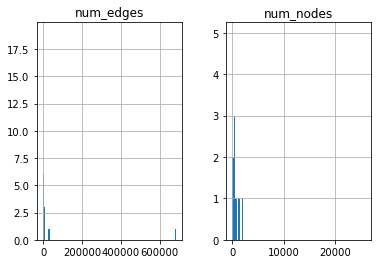

In [8]:
hist = summary.hist(bins=1000)

In [19]:
summary.sort_values(by=['num_nodes'])

,city,num_edges,num_nodes
1,ccd,3.0,23.0
44,haddonfield,4516.0,34.0
51,baoding,1440.0,73.0
10,haven,2174.0,79.0
2,oshima-gdm,0.0,96.0
...,...,...,...
67,chico,31011.0,3015.0
25,mississauga,14073.0,3825.0
8,hsl,377119.0,7661.0
46,oakland,172926.0,8753.0


In [3]:
# !pip install ampligraph
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████            | 320.4 MB 132.4 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████████▏ | 482.3 MB 133.6 MB/s eta 0:00:01

     |██████████████████████████████▋ | 489.1 MB 133.6 MB/s eta 0:00:01

     |███████████████████████████████ | 495.8 MB 133.6 MB/s eta 0:00:01

     |███████████████████████████████▍| 502.6 MB 133.6 MB/s eta 0:00:01

     |███████████████████████████████▉| 509.4 MB 133.6 MB/s eta 0:00:01

     |████████████████████████████████| 511.7 MB 133.6 MB/s eta 0:00:01

     |████████████████████████████████| 511.7 MB 31 kB/s               
     |████████████████████████████████| 123 kB 108.3 MB/s            
     |████████████████████████████████| 81 kB 1.8 MB/s              
     |████████████████████████████████| 4.5 MB 99.2 MB/s            
     |████████████████████████████████| 5.8 MB 101.4 MB/s            
     |████████████████████████████████| 2.4 MB 98.4 MB/s            
     |████████████████████████████████| 57 kB 1.1 MB/s             
     |████████████████████████████████| 65 kB 725 kB/s              
     |████████████████████████████████| 1.6 MB 102.4 MB/s            
     |████████████████████████████████| 438 kB 110.1 MB/s            
     |████████████████████████████████| 42 kB 107 kB/s             
     |████████████████████████████████| 14.5 MB 101.2 MB/s            
     |████████████████████████████████| 4.9 MB 98.4 MB/s            


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/.autofs/tools/spack/opt/spack/linux-rhel7-skylake_avx512/gcc-9.3.0/python-3.8.7-vbbky6n2roxmrih3hr2ebndq6rmdoymm/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
import ampligraph

2022-06-02 06:37:28.248531: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-02 06:37:28.266053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.autofs/tools/spack/opt/spack/linux-rhel7-skylake_avx512/gcc-9.3.0/py-tensorboard-2.4.1-zphcizgyf5yjpqic4mxinw37xv7jayw5/lib:/.autofs/tools/spack/opt/spack/linux-rhel7-skylake_avx512/gcc-9.3.0/py-wheel-0.37.0-avnsfbplw7ujurgz74evo5rxdfvmq7n2/lib:/.autofs/tools/spack/opt/spack/linux-rhel7-skylake_avx512/gcc-9.3.0/py-werkzeug-2.0.2-ppzpdvttet7ji56ltmmeerixermzpwlu/lib:/.autofs/tools/spack/opt/spack/linux-rhel7-skylake_avx512/gcc-9.3.0/py-tensorboard-plugi

In [5]:
ampligraph.__version__

'1.4.0'

In [6]:
import numpy as np
from ampligraph.datasets import load_wn18
from ampligraph.latent_features import ComplEx
from ampligraph.evaluation import evaluate_performance, mrr_score, hits_at_n_score

ModuleNotFoundError: No module named 'tensorflow.contrib'